# City of Los Angeles: Job Bulletins into CSV 

### Introduction

The City of Los Angeles has a variety of job classes, but unfortunately much of the data regarding these classes is stored in free form job bulletins.

We see tremendous value in structuring this data as it could help us better understand our workforce, and  improve our hiring processes.

Below is the standard Kaggle intro cell, which gives an explanation of the environment we're operating in as well as imports pandas, numpy, and os.

In [1]:
!pip install word2number

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import re
import os
from datetime import datetime
import string
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from word2number import w2n

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

print(os.listdir("../input/cityofla/CityofLA"))

# Any results you write to the current directory are saved as output.

['Job Bulletins', 'Additional data']


**Check filenames**

In [3]:
!ls ../input/cityofla/CityofLA/Job\ Bulletins

311 DIRECTOR  9206 041814.txt
ACCOUNTANT 1513 062218.txt
ACCOUNTING CLERK 1223 071318.txt
ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt
ADMINISTRATIVE ANALYST 1590 060118.txt
ADMINISTRATIVE CLERK 1358 033018 (2).txt
ADMINISTRATIVE HEARING EXAMINER 9135 100915.txt
ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 2325 020808 REV 111214.txt
AIR CONDITIONING MECHANIC 3774 041417.txt
AIR CONDITIONING MECHANIC SUPERVISOR 3781 111618 2.txt
AIRPORT AIDE 1540 081018.txt
AIRPORT CHIEF INFORMATION SECURITY OFFICER 1404 120415_Modified.txt
AIRPORT ENGINEER 7256 070618.txt
AIRPORT GUIDE 0845 042018.txt
AIRPORT INFORMATION SPECIALIST 1783 121115.txt
AIRPORT LABOR RELATIONS ADVOCATE 9210 020119.txt
AIRPORT MANAGER 7260 120216.txt
AIRPORT POLICE CAPTAIN 3228 021618.txt
AIRPORT POLICE LIEUTENANT 3227 091616.txt
AIRPORT POLICE OFFICER 3225 110906 Rev 060115.txt
AIRPORT POLICE SPECIALIST 3236 063017 (2).txt
AIRPORT SUPERINTENDENT OF OPERATIONS 7268 121815 (1).txt
AIRPORTS MAINTENANCE SUPERINTENDENT 3331 02151

In [4]:
!ls ../input/cityofla/CityofLA/Additional\ data

City Job Paths
Description of promotions in job bulletins.docx
PDFs
job bulletins with annotations
job_titles.csv
kaggle_data_dictionary.csv
sample job class export template.csv


Print a single job bulletin

In [5]:
import random
import os
bulletins_dir = "../input/cityofla/CityofLA/Job Bulletins"
bulletins = os.listdir("../input/cityofla/CityofLA/Job Bulletins")
print("{} files".format(len(bulletins)))
for i in range(1):
    rand = random.randint(0, len(bulletins))
    file = os.path.join(bulletins_dir, bulletins[rand])
    with open(file) as f:
        for x in f.readlines():
            print(x)

683 files
CONSTRUCTION EQUIPMENT SERVICE WORKER



Class Code:       3541

Open Date:  01-26-18 

(Exam Open to All, including Current City Employees)

ANNUAL SALARY



$42,741 to $60,823 

The salary in the Department of Water and Power is $57,148 to $71,012 and $71,075 to $75,042. 



NOTES:



1. For information regarding reciprocity between the City of Los Angeles departments and LADWP, go to http://per.lacity.org/Reciprocity_CityDepts_and_DWP.pdf.

2. Annual salary is at the start of the pay range. The current salary range is subject to change. Please confirm the starting salary with the hiring department before accepting a job offer.

3. Candidates from the eligible list are normally appointed to vacancies in the lower pay grade positions.

4. In some positions, employees receive bonus pay for working during night hours or working under hazardous or unpleasant conditions.



DUTIES



A Construction Equipment Service Worker fuels, lubricates, cleans and performs other non-repair 

**Additional Data**

PDF is the same data (?)

In [6]:
from wand.image import Image as Img

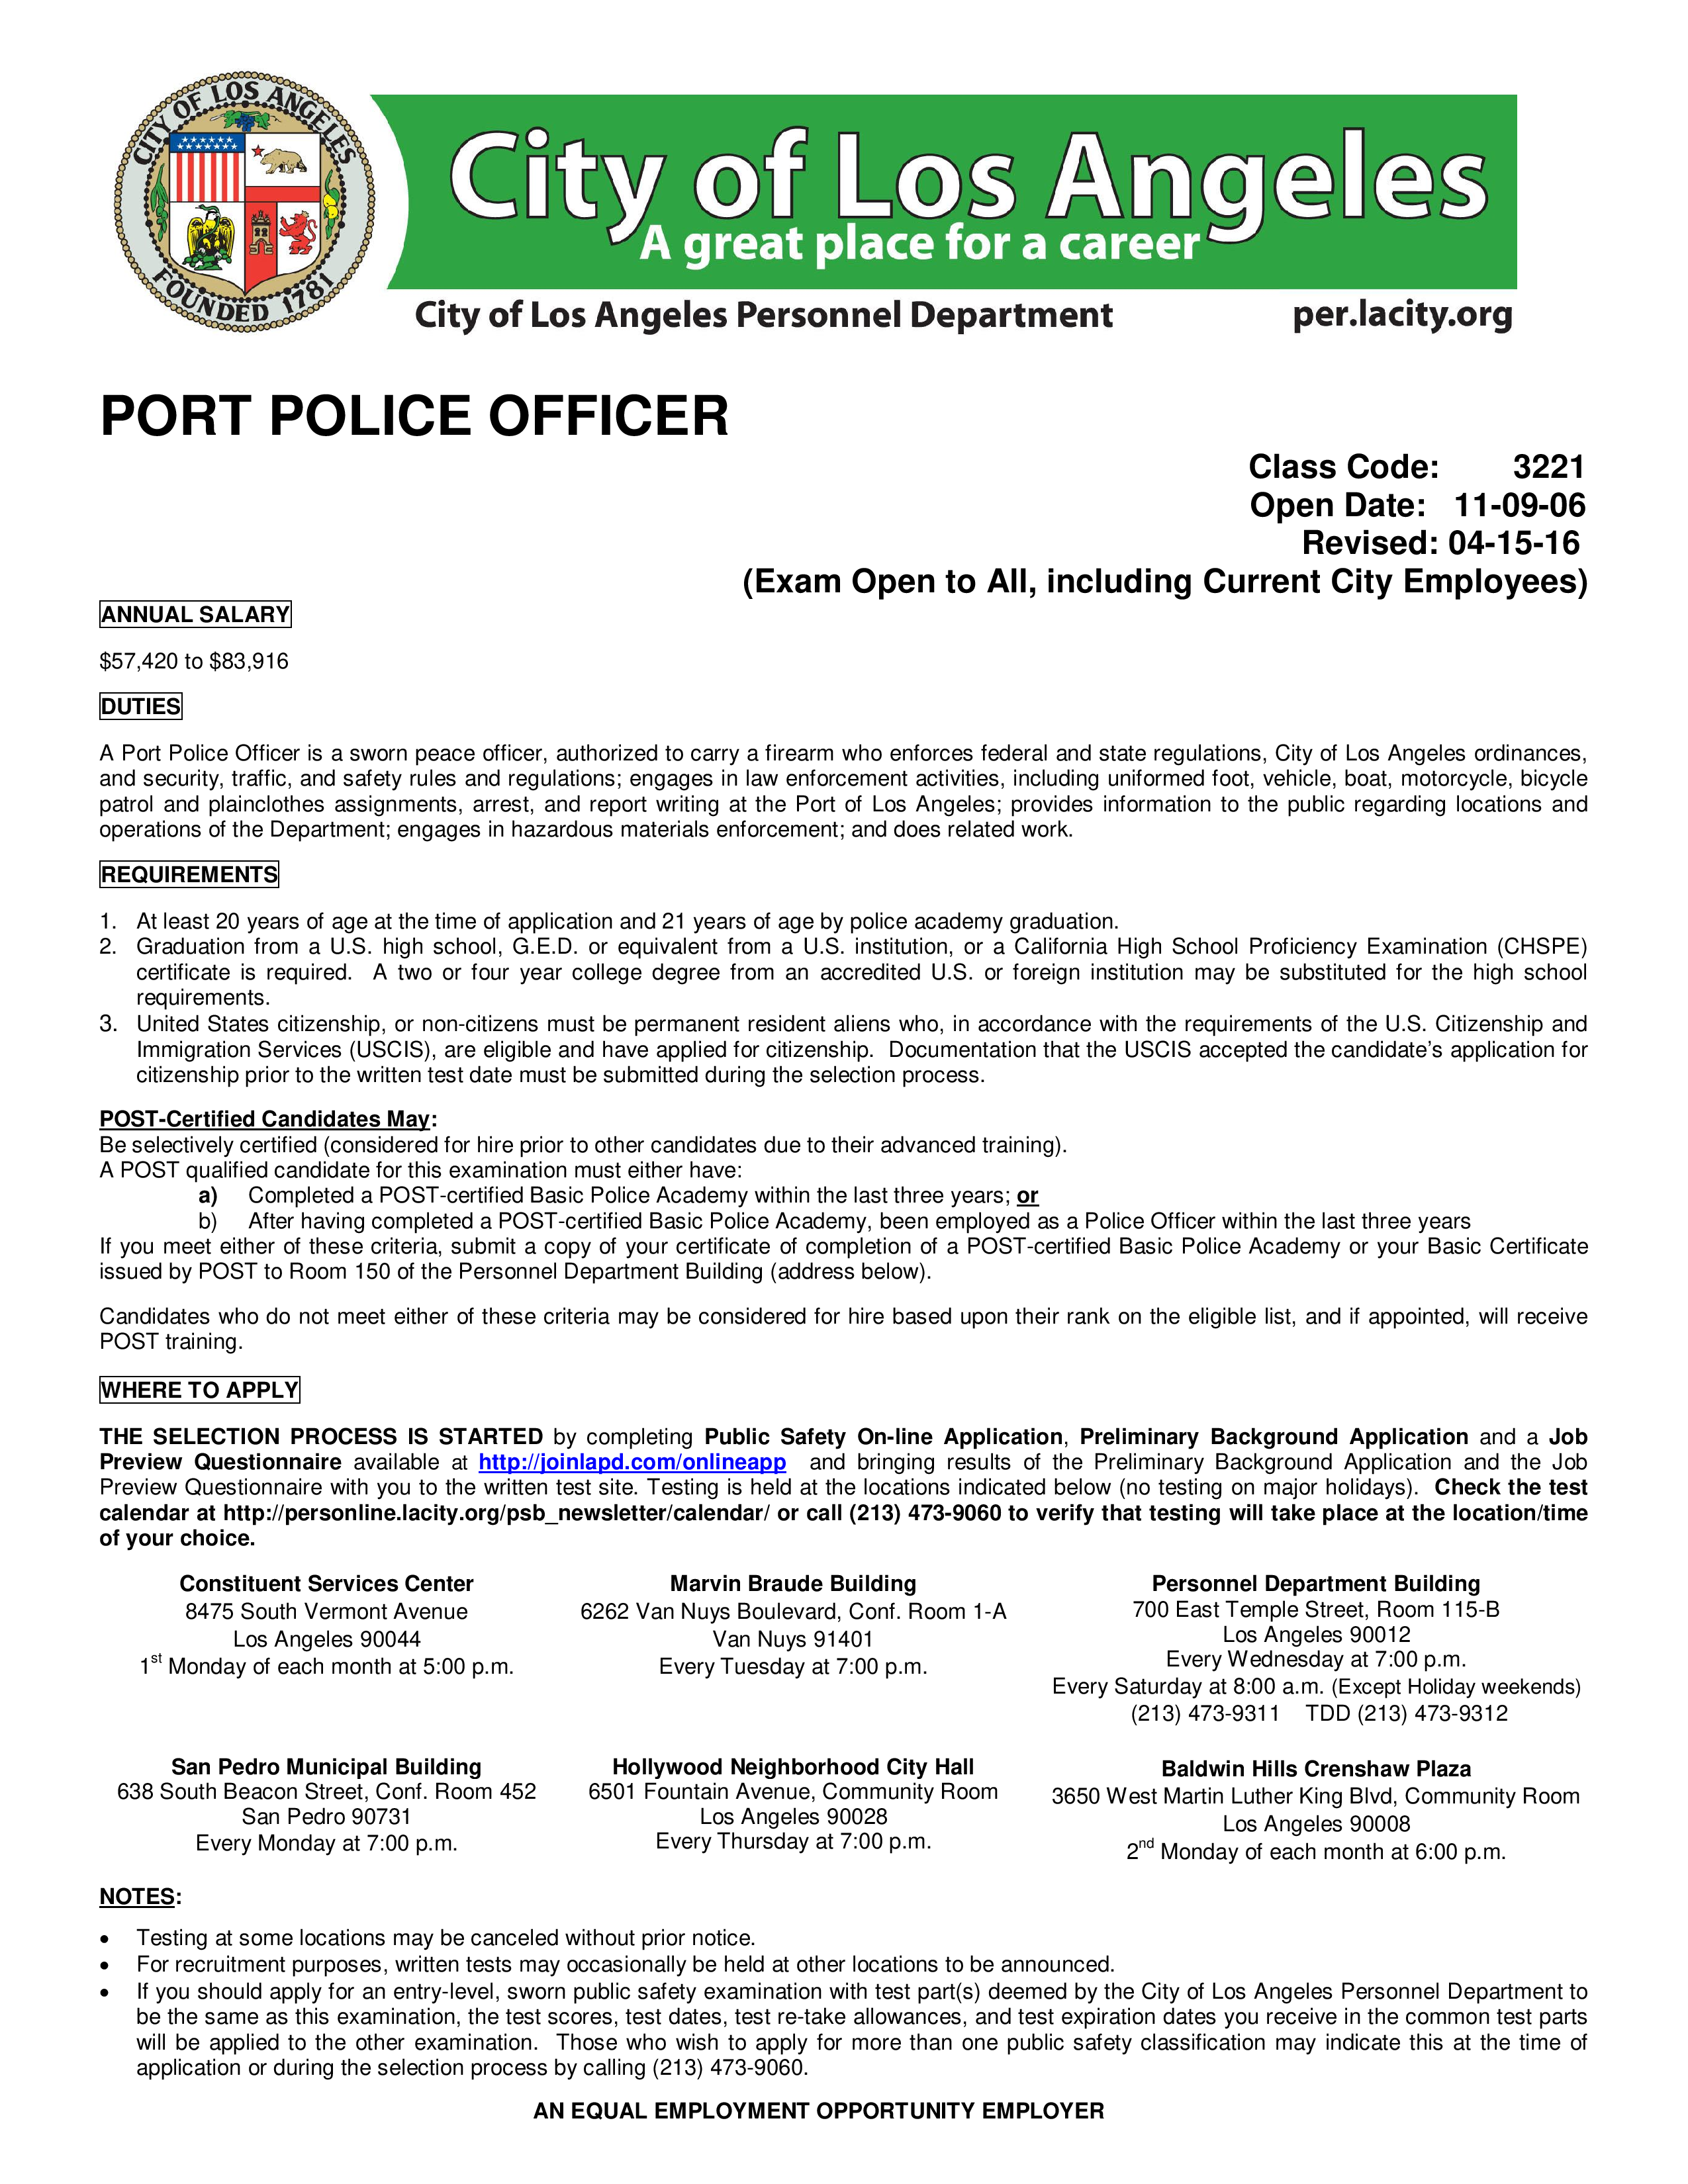

In [7]:
Img(filename='../input/cityofla/CityofLA/Additional data/PDFs/2016/April 2016/PORT POLICE OFFICER 3221 Rev 041516.pdf', resolution=300)

In [8]:
additional = os.listdir("../input/cityofla/CityofLA/Additional data/")
print(additional)

['sample job class export template.csv', 'PDFs', 'job_titles.csv', 'Description of promotions in job bulletins.docx', 'City Job Paths', 'job bulletins with annotations', 'kaggle_data_dictionary.csv']


In [9]:
import pandas as pd
path_additional = "../input/cityofla/CityofLA/Additional data/"
job_titles = pd.read_csv(os.path.join(path_additional, 'job_titles.csv'))
sample_job = pd.read_csv(os.path.join(path_additional, 'sample job class export template.csv'))
kaggle_data = pd.read_csv(os.path.join(path_additional, 'kaggle_data_dictionary.csv'))

In [10]:
job_titles.head()

,311 DIRECTOR
0,ACCOUNTANT
1,ACCOUNTING CLERK
2,ACCOUNTING RECORDS SUPERVISOR
3,ADMINISTRATIVE ANALYST
4,ADMINISTRATIVE CLERK


In [11]:
job_titles.shape

(667, 1)

683 files
667 job titles


In [12]:
sample_job.head()

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,REQUIREMENT_SUBSET_ID,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,EXP_JOB_CLASS_ALT_RESP,EXP_JOB_CLASS_FUNCTION,COURSE_COUNT,COURSE_LENGTH,COURSE_SUBJECT,MISC_COURSE_DETAILS,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,ADDTL_LIC,EXAM_TYPE,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE
0,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,1,A,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,COMPUTER SCIENCE|INFORMATION SYSTEMS|GEOGRAPHI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
1,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,2,A,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,NaN,2.0,FULL-TIME,MANAGEMENT ASSISTANT,NaN,"the development, analysis, implementation or m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
2,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,2,B,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,NaN,2.0,FULL-TIME,MANAGEMENT ASSISTANT,NaN,"performing cost benefit, feasibility and requi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
3,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,2,C,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,NaN,2.0,FULL-TIME,MANAGEMENT ASSISTANT,NaN,performing system implementation and support a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
4,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,3,A,"A Systems Analyst analyzes procedures, methods...",NaN,NaN,NaN,2.0,FULL-TIME,SYSTEMS AIDE,NaN,NaN,4.0,"3M, 4Q",INFORMATION SYSTEMS|SYSTEMS ANALYSIS|closely r...,At least three of the courses must be from the...,M,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17


Dictionary

In [13]:
kaggle_data

,Field Name,Annotation Letter,Description,Data Type,Allowable Values,Accepts Null Values?,Additional Notes
0,FILE_NAME,NaN,The file name of the job bulletin from which e...,String,NaN,No,NaN
1,JOB_CLASS_TITLE,A,"The title of the particular class (e.g., Syste...",String,Any job title matching in in supplied job bull...,No,NaN
2,JOB_CLASS_NO,B,The 4-digit code that corresponds to the job c...,String,Any four character numeric string matching one...,No,Some classes have three non-zero digits — e.g....
3,REQUIREMENT_SET_ID,D1,A main requirement that has to be filled. Thes...,Integer,Any positive integer,No,NaN
4,REQUIREMENT_SUBSET_ID,D2,"A secondary requirement that has to be filled,...",String,Any letter or combination of letters.,No,"A-Z represents 1-26. In the case of 27th, 28th..."
5,JOB_DUTIES,C,A summary of what someone does in the particul...,String,NaN,No,NaN
6,EDUCATION_YEARS,F,Years required in a particular education program,Float,Any positive float representing years or a fra...,Yes,Any job description that mentions months shoul...
7,SCHOOL_TYPE,G,School Type: School type required (e.g. colleg...,String,"COLLEGE OR UNIVERSITY, HIGH SCHOOL, APPRENTICE...",Yes,Allowable value list is most likely incomplete...
8,EDUCATION_MAJOR,H,Major or concentration required,String,NaN,Yes,A list of many sufficient majors should appear...
9,EXPERIENCE_LENGTH,I,Years required in a particular job class or ex...,Float,NaN,Yes,Some classes may specify months rather than ye...


In [14]:
kaggle_data.shape


(25, 7)

In [15]:
sample_job.shape

(5, 25)

### Structuring the Job Bulletin Data into a CSV

Here we're collecting data from all of the job bulletins and storing it in a CSV.

The code block below goes through all of the job bulletins, extracts data, and puts it in a DataFrame.

In [16]:
def process_bulletins(df, _bulletins):
    
    re_open_date = re.compile(r'(open date:)(\s+)((\d)?\d-\d\d-\d\d)', re.IGNORECASE|re.MULTILINE) 
    re_class_code = re.compile(r'class code:(\s+)([0-9a-z]+)', re.IGNORECASE|re.MULTILINE)
    re_requirements = re.compile(r'(REQUIREMENTS?/\s?MINIMUM QUALIFICATIONS?)(.*)(PROCESS NOTE)', re.MULTILINE)
    re_duties = re.compile(r'(DUTIES)(.*)(REQ[A-Z])', re.MULTILINE)
    re_education_years = re.compile(r'(.*)college(.*)university(.*)\s+(\d+)\s+(.*)(semester)', re.IGNORECASE|re.MULTILINE)
    re_school_type = re.compile(r'(.*)qualifying(.*)education(.*)from(.*)accredited(.*)', re.IGNORECASE|re.MULTILINE)
    re_edu_major = re.compile(r'(major|degree) in(.*)', re.IGNORECASE|re.MULTILINE)
    re_exp_length = re.compile(r'(.*)years(.*)full(.*)experience(.*)', re.IGNORECASE|re.MULTILINE)
    re_fulltime_parttime = re.compile(r'(.*)(full|part)(.*)experience(.*)', re.IGNORECASE|re.MULTILINE)
    re_exp_job_class_title = re.compile(r'(.*)experience as(.*)', re.IGNORECASE|re.MULTILINE)
    re_course_count = re.compile(r'(.*)completion of(.*)(course?)(.*)', re.IGNORECASE|re.MULTILINE)
    re_drivers_license_req = re.compile(r'(.*driver\'s(\s*)license)', re.IGNORECASE|re.MULTILINE)
    re_addtl_lic = re.compile(r'as a (licensed)(.+[;,.])', re.IGNORECASE|re.MULTILINE)
    re_exam_type = re.compile(r'THIS EXAM( |INATION )IS TO BE GIVEN(.*)BASIS', re.IGNORECASE|re.MULTILINE)
    re_entry_salary_gen = re.compile(r'(\$\d+,\d+)((\s(to|and)\s)(\$\d+,\d+))?')
    re_entry_salary_dwp = (r' (Water and Power is) (\$\d+,\d+)((\s(to|and)\s)(\$\d+,\d+))?')
    
    for filename in _bulletins:
        with open(bulletins_dir + "/" + filename, 'r', errors='ignore') as f:
            file = f.read().replace('\t', '')
            # job_class_title
            position = [x for x in file.split('\n') if x.isupper()][0]
            
            file = file.replace('\n', ' ')
            #file = ' '.join([x + '\n' for x in file.split(' ') if x.isupper()])
            #print(file)
            # open_date
            open_date_found = re.search(re_open_date, file)
            if open_date_found is not None:
                open_date = datetime.strptime(open_date_found.group(3), '%m-%d-%y')
            else:
                open_date = np.nan
              
            # job_class_no
            class_no_found = re.search(re_class_code, file)
            if class_no_found is not None:
                class_no = class_no_found.group(2)
            else:
                class_no = np.nan
                
            # requirements
            requirements_found = re.search(re_requirements, file)
            if requirements_found is not None:
                requirements = requirements_found.group(2)
            else:
                requirements = ""#re.search('(.*)NOTES?', re.findall(r'(REQUIREMENTS?)(.*)(NOTES?)', file)[0][1][:1200]).group(1)
            #print(requirements)
            
            # job_duties
            duties_found = re.search(re_duties, file)
            if duties_found is not None:
                duties = duties_found.group(2)
            else:
                duties = ""
                
            # education_years
            education_years_found = re.search(re_education_years, requirements)
            if education_years_found is not None:
                education_years = education_years_found.group(4).strip()
            else:
                education_years = np.nan
                
            # school_type
            school_type_found = re.search(re_school_type, file)
            if school_type_found is not None:
                school_type = school_type_found.group(4)
                school_type = school_type.split('accredited')[0]
            else:
                school_type = ''
                
            # education_major
            # course_subjects
            course_subjects = []
            education_major_found = re.search(re_edu_major, requirements)
            if education_major_found is not None:
                education_major = education_major_found.group(2)
                education_major = education_major.strip().strip('.').split(';')[0]
                education_major = education_major.replace('and/or', 'or').replace('landscape', 'lnadscape').split('and')[0]
                education_major = education_major.replace('lnadscape', 'landscape').split( 'or in' )[0]
                education_major = education_major.split( 'or upon' )[0]
                education_major = education_major.split( '.' )

                education_major = string.capwords(education_major[0])

                education_major_repl = education_major.replace(' or ', ',').replace(' Or ', ',').replace('A Related Field','').strip(',').split(',')
                if 0 < len(education_major_repl):
                    for major in education_major_repl:
                        if 0 < len(major.split(' or')):
                            for submajor in major.split(' or'):
                                course_subjects.append(submajor.strip())
                        else :
                            course_subjects.append(major.strip())                   
            else:
                education_major = '-'
                
            # experience_length
            experience_length_found = re.search(re_exp_length, file)
            if experience_length_found is not None:
                experience_length = experience_length_found.group(1).split()       
                if len(experience_length) > 0:
                    experience_length = experience_length[-1]
                    if '.' in experience_length:
                        experience_length = experience_length.split('.')[-1]
                    try:
                        experience_length = w2n.word_to_num(re.sub(r'[^a-zA-Z]+', '', experience_length))
                    except:
                        pass
                else:
                    experience_length = np.nan
            else:
                experience_length = np.nan
            
            # fulltime_parttime
            fulltime_parttime_found = re.search(re_fulltime_parttime, requirements)
            if fulltime_parttime_found is not None:
                fulltime_parttime = fulltime_parttime_found.group(2)         
                fulltime_parttime = (fulltime_parttime + '_TIME').upper()
            else:
                fulltime_parttime = None
                
            # exp_job_class_title
            exp_job_class_title_found = re.search(re_exp_job_class_title, requirements)
          
            if exp_job_class_title_found is not None:

                exp_job_class_title = exp_job_class_title_found.group(2)         
                exp_job_class_title = exp_job_class_title.strip().strip('.').lstrip('a ').lstrip('an ')
                broken = 0 
                if len(exp_job_class_title.split(';')) > 0:
                    for line in exp_job_class_title.split(';'):
                        if len(line.split('with')) > 0:
                            for sub_line in line.split('with'):
                                if 'Los Angeles' not in sub_line:
                                    sub_line = sub_line.strip().strip('.').lstrip('a ').lstrip('an ').split(' or in')
                                    sub_line = sub_line[0]
                                    if '.' not in sub_line:
                                        exp_job_class_title = string.capwords(sub_line.strip().strip('.').strip(','))
                                        exp_job_class_title = exp_job_class_title.split('.')
                                        exp_job_class_title = exp_job_class_title[0]
                                        broken = 1 
                                        break
                        if broken == 1:
                            break
                else: 
                    exp_job_class_title = '-'

            # course_count
            course_count_found = re.search(re_course_count, requirements)
            course_count = 0
            if course_count_found is not None:
                course_count = course_count_found.group(2)        
                course_count = course_count.split('course')[0]
                
                if len(course_count.strip().split(' ')) > 0:
                    for line in course_count.split(' '):
                        try:
                            course_count = w2n.word_to_num(line)
                            break
                        except:
                            continue
    
            # course_subject
            course_subject = '|'.join(course_subjects)
            
            # drivers_license_req
            drivers_license = []
            drivers_license_req_found = re.search(re_drivers_license_req, file)
            if drivers_license_req_found is not None:
                drivers_license_req = drivers_license_req_found.group()
                licenses = re.findall(r'([C,c]lass ([a-zA-Z]))', drivers_license_req)
                if len(licenses) > 0:
                    for license in licenses:
                        drivers_license.append(license[1])

                if('may' not in drivers_license_req and ('valid' in drivers_license_req or 'require' in drivers_license_req)):
                    drivers_license_req = 'R'
                elif('may' in drivers_license_req and ('valid' in drivers_license_req or 'require' in drivers_license_req)):
                    drivers_license_req = 'P'
            else:
                drivers_license_req = ''
            
            # driv_lic_type
            driv_lic_type = ','.join(set(drivers_license))
            
            # addtl_lic
            addtl_lic_found = re.search(re_addtl_lic, file)
            if addtl_lic_found is not None:
                addtl_lic = addtl_lic_found.group(2)
                addtl_lic = addtl_lic.strip().split('.')[0]
                addtl_lic = addtl_lic.strip().split('issued')[0]
                addtl_lic = addtl_lic.strip().split(';')[0]
            else:
                addtl_lic = np.nan
                
            # exam_type
            exam_type = '-'
            exam_types = []
            exam_type_found = re.search(re_exam_type, file)
            if exam_type_found is not None:
                exam_type = exam_type_found.group(2).upper()
                if('OPEN COMPETITIVE' in exam_type and 'INTERDEPARTMENTAL PROMOTION' in exam_type):
                    exam_types.append('OPEN_INT_PROM')
                else:    
                    if('OPEN COMPETITIVE' in exam_type):
                        exam_types.append('OPEN')
                    if('INTERDEPARTMENTAL PROMOTION' in exam_type):
                        exam_types.append('INT_DEPT_PROM')

                if(' DEPARTMENTAL PROMOTION' in exam_type):
                    exam_types.append('DEPT_PROM')
            else:
                exam_types.append('-')
            exam_type = ','.join(exam_types)
            
            # entry_salary_gen
            salary_gen = 0
            try:
                if re.search(re_entry_salary_gen, file).group():
                    salary_gen = []
                    if re.search(re_entry_salary_gen, file).group(1):
                        salary_gen.append((re.search(re_entry_salary_gen, file).group(1)).strip())
                    if re.search(re_entry_salary_gen, file).group(5):
                        salary_gen.append(re.search(re_entry_salary_gen, file).group(5).strip())
                    salary_gen = '-'.join(salary_gen)
            except:
                salary_gen = 0
                
            # entry_salary_dwp
            salary_dwp = 0
            try:
                if re.search(re_entry_salary_dwp, file).group():
                    salary_dwp = []
                    if re.search(re_entry_salary_dwp, file).group(2):
                        salary_dwp.append((re.search(re_entry_salary_dwp, file).group(2)).strip())
                    if re.search(re_entry_salary_dwp, file).group(6):
                        salary_dwp.append((re.search(re_entry_salary_dwp, file).group(6)).strip())
                    salary_dwp = '-'.join(salary_dwp)
            except:
                salary_dwp = 0
            
            df = df.append({'FILE_NAME': filename, 'JOB_CLASS_TITLE': position, 'JOB_CLASS_NO': class_no, 'JOB_DUTIES': duties,
                            'EDUCATION_YEARS': education_years, 'SCHOOL_TYPE': school_type, 'EDUCATION_MAJOR': education_major,
                            'EXPERIENCE_LENGTH': experience_length, 'FULL_TIME_PART_TIME': fulltime_parttime, 'EXP_JOB_CLASS_TITLE': exp_job_class_title,
                            'COURSE_COUNT': course_count, 'COURSE_SUBJECT': course_subject, 'DRIVERS_LICENSE_REQ': drivers_license_req,
                            'DRIV_LIC_TYPE': driv_lic_type, 'ADDTL_LIC': addtl_lic, 'EXAM_TYPE': exam_type,
                            'ENTRY_SALARY_GEN': salary_gen, 'ENTRY_SALARY_DWP': salary_dwp,
                            'OPEN_DATE': open_date}, ignore_index=True)
            
            #break
    return df

We are now taking the data within the list, putting it in a dataframe so that we can conduct our analysis, and saving the dataframe as a CSV.

In [17]:
df = pd.DataFrame(columns=['FILE_NAME', 'JOB_CLASS_TITLE', 'JOB_CLASS_NO', 'JOB_DUTIES',
                            'EDUCATION_YEARS', 'SCHOOL_TYPE', 'EDUCATION_MAJOR', 'EXPERIENCE_LENGTH', 'FULL_TIME_PART_TIME', 
                           'EXP_JOB_CLASS_TITLE', 'COURSE_COUNT', 'COURSE_SUBJECT', 'DRIVERS_LICENSE_REQ', 'DRIV_LIC_TYPE', 'ADDTL_LIC',
                           'EXAM_TYPE', 'ENTRY_SALARY_GEN', 'ENTRY_SALARY_DWP', 'OPEN_DATE'])
df = process_bulletins(df, bulletins)
df

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_COUNT,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,ADDTL_LIC,EXAM_TYPE,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE
0,PARK MAINTENANCE SUPERVISOR 3145 102618.txt,PARK MAINTENANCE SUPERVISOR,3145,A Park Maintenance Supervisor directly super...,12,a college or university,-,2,FULL_TIME,Oted Above And One Year Education (30 Semester...,0,,P,"a,m,C",NaN,INT_DEPT_PROM,"$51,448-$75,188","$83,728-$88,405",2018-10-26
1,ENVIRONMENTAL ENGINEER 7872 082616 REV 090116...,ENVIRONMENTAL ENGINEER,7872,An Environmental Engineer performs responsib...,NaN,,-,2,FULL_TIME,Oted Above And One Year Education (30 Semester...,0,,P,C,NaN,INT_DEPT_PROM,"$89,637-$127,555",0,2016-08-26
2,MOTION PICTURE AND TELEVISION MANAGER 1789 111...,MOTION PICTURE AND TELEVISION MANAGER,1789,A Motion Picture and Television Manager plan...,NaN,a college or university,-,2,FULL_TIME,Oted Above And One Year Education (30 Semester...,0,,R,C,NaN,OPEN_INT_PROM,"$120,080-$175,559",0,2017-11-17
3,HOUSING INVESTIGATOR 8516 062918.txt,HOUSING INVESTIGATOR,8516,A Housing Investigator conducts preliminary ...,30,a college or university,-,4,FULL_TIME,Oted Above And One Year Education (30 Semester...,0,,P,C,NaN,OPEN_INT_PROM,"$59,487-$86,965",0,2018-06-29
4,DEPARTMENTAL CHIEF ACCOUNTANT 1593 111717 revi...,DEPARTMENTAL CHIEF ACCOUNTANT,1593,A Departmental Chief Accountant plans and di...,NaN,,-,6,FULL_TIME,Oted Above And One Year Education (30 Semester...,0,,,,NaN,INT_DEPT_PROM,"$91,913-$130,771",0,2017-11-17
5,POLICE LIEUTENANT 2232 020918.txt,POLICE LIEUTENANT,2232,"A Police Lieutenant plans, organizes, and di...",NaN,a college or university,-,2,FULL_TIME,Oted Above And One Year Education (30 Semester...,0,,,,NaN,DEPT_PROM,"$125,572-$139,916",0,2018-02-09
6,AUDITOR 1517 031816 (1).txt,AUDITOR,1517,An Auditor conducts audits of financial and ...,NaN,a college or university,-,2,None,Oted Above And One Year Education (30 Semester...,0,,P,"a,C",NaN,OPEN_INT_PROM,"$54,455-$79,594",0,2016-03-18
7,SENIOR ELECTRICAL MECHANIC 3834 060217 (2) REV...,SENIOR ELECTRICAL MECHANIC,3834,A Senior Electrical Mechanic acts as lead fo...,NaN,,-,2,FULL_TIME,Electrical Mechanic,0,,P,"A,C",NaN,INT_DEPT_PROM,"$111,540",0,2017-06-02
8,REPROGRAPHICS SUPERVISOR 3163 091517.txt,REPROGRAPHICS SUPERVISOR,3163,"A Reprographics Supervisor assigns, reviews,...",NaN,,-,3,FULL_TIME,Reprographics Operator,0,,,,NaN,OPEN_INT_PROM,"$47,752-$69,822",0,2017-09-15
9,PORT POLICE OFFICER 3221 110906 Rev 060115.txt,PORT POLICE OFFICER,3221,A Port Police Officer is a sworn peace offic...,NaN,,-,NaN,None,Reprographics Operator,0,,P,"h,C,o",NaN,OPEN,"$48,713-$81,474",0,2006-11-09


In [18]:
df.to_csv("competition_output.csv")
kaggle_data.to_csv("data_dictionary.csv")

### Analysis

Now that we have the data structured in a dataframe, we can conduct our analysis.

In [19]:
df.describe()

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXP_JOB_CLASS_TITLE,COURSE_COUNT,COURSE_SUBJECT,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,ADDTL_LIC,EXAM_TYPE,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE
count,683,683,680,683,36,683,683,571.0,450,683,683.0,683,683,683,9,683,683,683.0,682
unique,683,673,675,675,10,12,49,13.0,2,182,22.0,48,3,31,9,7,601,162.0,225
top,MASONRY WORKER 3451 011918.txt,ANNUAL SALARY,5885,,12,,-,2.0,FULL_TIME,Library Clerical Assistant Or Administrative C...,0.0,,P,C,Vocational Nurse,INT_DEPT_PROM,"$123,066-$179,943",0.0,2017-01-20 00:00:00
freq,1,3,2,7,14,479,630,369.0,442,25,646.0,630,605,379,1,305,6,506.0,12
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-02-05 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-11 00:00:00
